In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('/home/chc/anaconda/', one_hot=True)


W0821 10:53:23.386600 140312452142976 deprecation.py:323] From <ipython-input-2-d7c6a0484349>:2: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0821 10:53:23.388420 140312452142976 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0821 10:53:23.389436 140312452142976 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instruction

Extracting /home/chc/anaconda/train-images-idx3-ubyte.gz


W0821 10:53:23.688095 140312452142976 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0821 10:53:23.691117 140312452142976 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0821 10:53:23.751630 140312452142976 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be remove

Extracting /home/chc/anaconda/train-labels-idx1-ubyte.gz
Extracting /home/chc/anaconda/t10k-images-idx3-ubyte.gz
Extracting /home/chc/anaconda/t10k-labels-idx1-ubyte.gz


In [3]:


print("Size of:")
print("- Training-set:\t\t{}".format(len(data.train.labels)))
print("- Test-set:\t\t{}".format(len(data.test.labels)))
print("- Validation-set:\t{}".format(len(data.validation.labels)))

Size of:
- Training-set:		55000
- Test-set:		10000
- Validation-set:	5000


In [4]:
# Placeholder variable for the input images
x = tf.placeholder(tf.float32, shape=[None, 28*28], name='X')
# Reshape it into [num_images, img_height, img_width, num_channels]
x_image = tf.reshape(x, [-1, 28, 28, 1])

# Placeholder variable for the true labels associated with the images
y_true = tf.placeholder(tf.float32, shape=[None, 10], name='y_true')
y_true_cls = tf.argmax(y_true, dimension=1)


W0821 10:53:29.362433 140312452142976 deprecation.py:506] From <ipython-input-4-cc3006e79a1a>:7: calling argmax (from tensorflow.python.ops.math_ops) with dimension is deprecated and will be removed in a future version.
Instructions for updating:
Use the `axis` argument instead


# Function for creating a new Convolution Layer

In [0]:
def new_conv_layer(input, num_input_channels, filter_size, num_filters, name):
    
    with tf.variable_scope(name) as scope:
        # Shape of the filter-weights for the convolution
        shape = [filter_size, filter_size, num_input_channels, num_filters]

        # Create new weights (filters) with the given shape
        weights = tf.Variable(tf.truncated_normal(shape, stddev=0.05))

        # Create new biases, one for each filter
        biases = tf.Variable(tf.constant(0.05, shape=[num_filters]))

        # TensorFlow operation for convolution
        layer = tf.nn.conv2d(input=input, filter=weights, strides=[1, 1, 1, 1], padding='SAME')

        # Add the biases to the results of the convolution.
        layer += biases
        
        return layer, weights

In [0]:
def new_pool_layer(input, name):
    
    with tf.variable_scope(name) as scope:
        # TensorFlow operation for convolution
        layer = tf.nn.max_pool(value=input, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
        
        return layer

In [0]:
def new_relu_layer(input, name):
    
    with tf.variable_scope(name) as scope:
        # TensorFlow operation for convolution
        layer = tf.nn.relu(input)
        
        return layer

In [0]:
def new_fc_layer(input, num_inputs, num_outputs, name):
    
    with tf.variable_scope(name) as scope:

        # Create new weights and biases.
        weights = tf.Variable(tf.truncated_normal([num_inputs, num_outputs], stddev=0.05))
        biases = tf.Variable(tf.constant(0.05, shape=[num_outputs]))
        
        # Multiply the input and weights, and then add the bias-values.
        layer = tf.matmul(input, weights) + biases
        
        return layer




# Create Convolutional Neural Network

In [0]:
# Convolutional Layer 1
layer_conv1, weights_conv1 = new_conv_layer(input=x_image, num_input_channels=1, filter_size=5, num_filters=6, name ="conv1")

# Pooling Layer 1
layer_pool1 = new_pool_layer(layer_conv1, name="pool1")

# RelU layer 1
layer_relu1 = new_relu_layer(layer_pool1, name="relu1")

# Convolutional Layer 2
layer_conv2, weights_conv2 = new_conv_layer(input=layer_relu1, num_input_channels=6, filter_size=5, num_filters=16, name= "conv2")

# Pooling Layer 2
layer_pool2 = new_pool_layer(layer_conv2, name="pool2")

# RelU layer 2
layer_relu2 = new_relu_layer(layer_pool2, name="relu2")

# Flatten Layer
num_features = layer_relu2.get_shape()[1:4].num_elements()
layer_flat = tf.reshape(layer_relu2, [-1, num_features])

# Fully-Connected Layer 1
layer_fc1 = new_fc_layer(layer_flat, num_inputs=num_features, num_outputs=128, name="fc1")

# RelU layer 3
layer_relu3 = new_relu_layer(layer_fc1, name="relu3")

# Fully-Connected Layer 2
layer_fc2 = new_fc_layer(input=layer_relu3, num_inputs=128, num_outputs=10, name="fc2")

In [0]:
# Use Softmax function to normalize the output
with tf.variable_scope("Softmax"):
    y_pred = tf.nn.softmax(layer_fc2)
    y_pred_cls = tf.argmax(y_pred, dimension=1)

# Cost Function

In [11]:
# Use Cross entropy cost function
with tf.name_scope("cross_ent"):
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=layer_fc2, labels=y_true)
    cost = tf.reduce_mean(cross_entropy)
    

W0821 10:53:37.366815 140312452142976 deprecation.py:323] From <ipython-input-11-0709eaec5fa0>:2: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



# Optimizer

In [0]:
# Use Adam Optimizer
with tf.name_scope("optimizer"):
    optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(cost)

# Accuracy

In [0]:
# Accuracy
with tf.name_scope("accuracy"):
    correct_prediction = tf.equal(y_pred_cls, y_true_cls)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [0]:
# Initialize the FileWriter
writer = tf.summary.FileWriter("Training_FileWriter/")
writer1 = tf.summary.FileWriter("Validation_FileWriter/")

In [0]:
# Add the cost and accuracy to summary
tf.summary.scalar('loss', cost)
tf.summary.scalar('accuracy', accuracy)

# Merge all summaries together
merged_summary = tf.summary.merge_all()

In [0]:
num_epochs = 50
batch_size = 100
t_accuracy = []
cost_array = []

# TensorFlow Session

In [17]:
with tf.Session() as sess:
    # Initialize all variables
    sess.run(tf.global_variables_initializer())
    
    # Add the model graph to TensorBoard
    writer.add_graph(sess.graph)
    
    # Loop over number of epochs
    for epoch in range(num_epochs):
        
        start_time = time.time()
        train_accuracy = 0
        
        for batch in range(0, int(len(data.train.labels)/batch_size)):
            
            # Get a batch of images and labels
            x_batch, y_true_batch = data.train.next_batch(batch_size)
            
            # Put the batch into a dict with the proper names for placeholder variables
            feed_dict_train = {x: x_batch, y_true: y_true_batch}
            
            # Run the optimizer using this batch of training data.
            sess.run(optimizer, feed_dict=feed_dict_train)
            
            # Calculate the accuracy on the batch of training data
            train_accuracy += sess.run(accuracy, feed_dict=feed_dict_train)
            
            # Generate summary with the current batch of data and write to file
            summ = sess.run(merged_summary, feed_dict=feed_dict_train)
            writer.add_summary(summ, epoch*int(len(data.train.labels)/batch_size) + batch)
        
          
        train_accuracy /= int(len(data.train.labels)/batch_size)
        
        t_accuracy .append(train_accuracy)
        cost_array.append(sess.run(cost, feed_dict={x:data.validation.images, y_true:data.validation.labels}))
        
        # Generate summary and validate the model on the entire validation set
        summ, vali_accuracy = sess.run([merged_summary, accuracy], feed_dict={x:data.validation.images, y_true:data.validation.labels})
        writer1.add_summary(summ, epoch)
        
        
        

        end_time = time.time()
        
        print("Epoch "+str(epoch+1)+" completed : Time usage "+str(int(end_time-start_time))+" seconds")
        print("\tAccuracy:")
        print ("\t- Training Accuracy:\t{}".format(train_accuracy))
        print ("\t- Validation Accuracy:\t{}".format(vali_accuracy))
        
        

Epoch 1 completed : Time usage 60 seconds
	Accuracy:
	- Training Accuracy:	0.703127271045338
	- Validation Accuracy:	0.875
Epoch 2 completed : Time usage 59 seconds
	Accuracy:
	- Training Accuracy:	0.8939272740754214
	- Validation Accuracy:	0.9093999862670898
Epoch 3 completed : Time usage 60 seconds
	Accuracy:
	- Training Accuracy:	0.9178181827068329
	- Validation Accuracy:	0.9327999949455261
Epoch 4 completed : Time usage 60 seconds
	Accuracy:
	- Training Accuracy:	0.9310545475916429
	- Validation Accuracy:	0.9423999786376953
Epoch 5 completed : Time usage 60 seconds
	Accuracy:
	- Training Accuracy:	0.9421090927991
	- Validation Accuracy:	0.9516000151634216
Epoch 6 completed : Time usage 60 seconds
	Accuracy:
	- Training Accuracy:	0.950600001486865
	- Validation Accuracy:	0.9593999981880188
Epoch 7 completed : Time usage 60 seconds
	Accuracy:
	- Training Accuracy:	0.9567454581910914
	- Validation Accuracy:	0.9660000205039978
Epoch 8 completed : Time usage 60 seconds
	Accuracy:
	- Tra

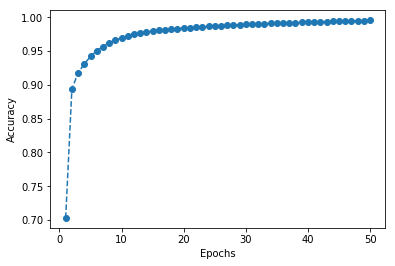

In [18]:
import matplotlib.pyplot as plt
plt.plot(range(1,num_epochs+1), t_accuracy , linestyle='--', marker='o')
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.show()

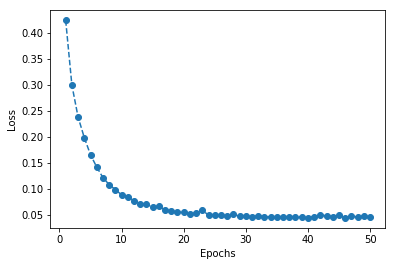

In [19]:
plt.plot(range(1,num_epochs+1), cost_array , linestyle='--', marker='o')
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()